# Week 01 In Class Assignment: Covid modeling

### <p style="text-align: right;"> &#9989; Kyle Taft
<p style="text-align: right;"> &#9989; Carter, Nicolai

____

*Welcome to your first ICA!*

In this first ICA you are going to work through the process of completing a project with your group and learn a little about curve fitting. 
Most of the coding has been done for you: you need to understand the coding, get it to work on your machine and be able to make modfications to the code. It's open ended what you choose to do. 

**You have one hour to complete this assignment. After one hour we will choose a few groups randomly to present what they did. Make nice plots and compose a narrative/story with your group in case you are picked.**

There are many ways we could make predictions from data, and we'll see some very powerful ways of doing this later in the semester. In particular, we want to predict the future of covid. That is, we want to forecast what covid will do for the rest of the semester based on recent data. 

For today, let's do something very simple: collect covid data, construct several hypotheses $g$, fit the hypotheses $g$ to the data, determine which $g$ is likely to be closest to the true function and use that $g$ to predict the future (forecast).  We will use data from the New York Times, which is in the form of a CSV (comma separated values) file. 

The data can be found [here](https://github.com/nytimes/covid-19-data/blob/master/rolling-averages/us.csv)

Read through this code and be sure you understand (most of) it. Surely there will be a few things you haven't seen yet, and don't worry about that for now. Discuss the code with your group and see if together you can understand most of what it does. If this code looks very mysterious to you, contact me right away - you might need some Python catch-up! 

In [2]:
# read libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
from scipy.optimize import curve_fit # no fancy ML library yet, just SciPy
import pandas as pd

## Part 1. Get the data

In [82]:
# Read data, put it into a dataframe and process it a bit
# you will need to modify this so that it points to the file you downloaded
df = pd.read_csv("us.csv")
df["days"] = df.index
df

,date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,days
0,2020-01-21,USA,1,0.14,0.00,0,0.00,0.00,0
1,2020-01-22,USA,0,0.14,0.00,0,0.00,0.00,1
2,2020-01-23,USA,0,0.14,0.00,0,0.00,0.00,2
3,2020-01-24,USA,1,0.29,0.00,0,0.00,0.00,3
4,2020-01-25,USA,1,0.43,0.00,0,0.00,0.00,4
...,...,...,...,...,...,...,...,...,...
1153,2023-03-19,USA,1424,22338.34,6.73,0,333.64,0.10,1153
1154,2023-03-20,USA,9787,22590.73,6.81,138,289.82,0.09,1154
1155,2023-03-21,USA,18373,22390.54,6.75,213,282.61,0.09,1155
1156,2023-03-22,USA,51812,20771.15,6.26,736,257.28,0.08,1156


## Explore the dataset

Use `pandas` and `seaborn` to explore the dataset

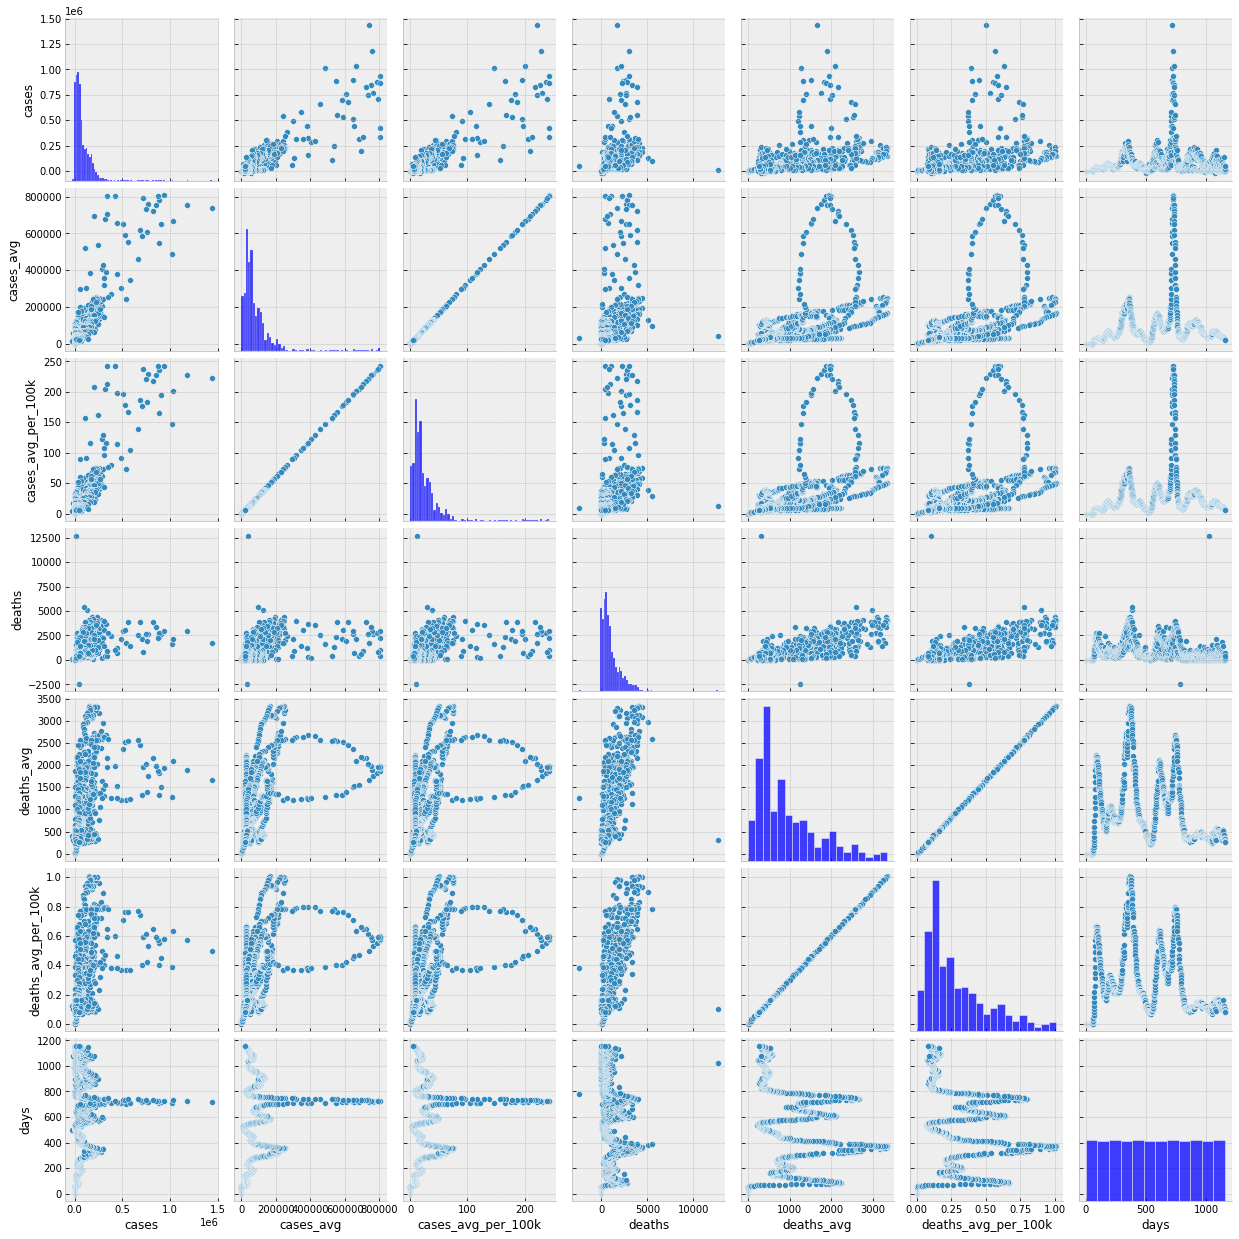

In [19]:
# Let's look at the dataset first
# Use this code cell to learn something from the dataset
sns.pairplot(df)

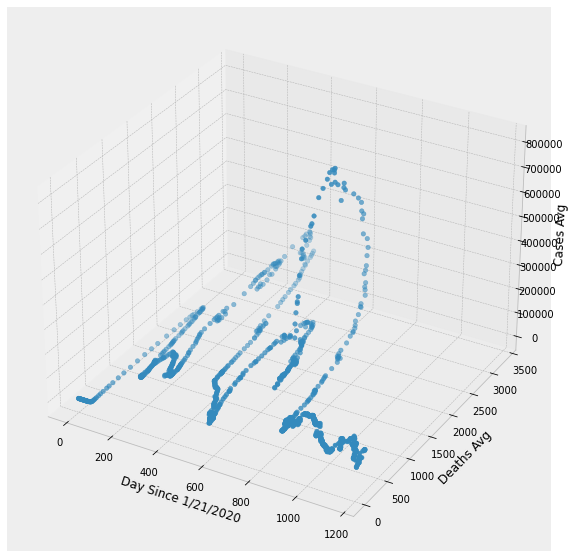

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points as a scatter plot
ax.scatter(df["days"], df["deaths_avg"],df["cases_avg"] )

# Set labels for each axis
ax.set_zlabel('Cases Avg')
ax.set_ylabel('Deaths Avg')
ax.set_xlabel('Day Since 1/21/2020')

# Show the plot
plt.show()


&#9989;&nbsp; **Question 1:** What have you learned? Based on your analysis what are the most important features? What feature would you use to model and predict the spread of covid?



<font size="+3">&#9998;</font> *Time series data. The most important feature is the cases if we are trying to predict the spread of covid.*

## Part 2. Modeling

The dataset contains the number of COVID cases and deaths, with their respective rolling averages, from Jan 21 2020 until March 03 2023. We want to predict the number of cases so let's take only a slice of our dataset. 

Modify the code below to read in as many columns as you want to explore. 

I'll give you an idea: today, many people use home testing for covid. And, testing is imperfect. As a result, the number of reported cases likely has a huge uncertainty. But (sadly), when someone dies it is pretty clear and always reported. Perhaps forecasting deaths is more meaningful? Try both? 

## Training and Testing dataset

Since we are using time series data our training dataset and testing dataset correspond to slices in time with consecutive values. Obviously, the testing dataset should be the last days/months. 

In the cell below divide your dataset into a training set and into a testing set. 

In [83]:
# Put your code here
# Choose your time range
cases = df["cases_avg"].iloc[1000:1085]
# It is easier to have a numeric array for the x-axis, but plots are nicer when you use a datetime format.
days = np.arange(len(cases))

In [84]:
days

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157])

## Define your model

This is where we define our hypotheses. One is given here -- a Gaussian -- but you will want to try several choices. Look at your data to see what makes sense. Even better, _think_ about your data; for example, would a polynomial be reasonable? 

Have each person in your group suggest a different hypothesis.

In [73]:
# define the hypotheses we want to fit to
# change this to any other functions you want to try

def gaussian(x, a, b, c, d):
    return a*np.exp(-(x - b)**2/c) + d

# Keep adding your models here

def model_1(x, a, b, c, d):
    return a/(1+np.exp(-b*(x-c))) + d



def model_2(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

def model_3(x,a,b):
    return a*x + b

def gompertz(x,a,b,c,d):
    return a*np.exp(-b*np.exp(-c*x)) + d

## Train your model

In the next few cells you will use `curve_fit` to learn the parameters of your model. Pay attention to what the `curve_fit` library is returning. Apart from just doing the curve fit, it provides quantitative information about the quality of the fit, which you can use for what is called "model selection". That is, you can use this information to inform you which hypothesis is best. 

Curve fitting works by solving an optimization problem; we will see a lot of optimization in this course. Sometimes it is necessary to help the optimization process by giving a good intitial guess. That is done here. If it doesn't help, comment it out. Or, if `curve_fit` is having trouble finding a solution for one of your hypotheses, this is how you help it. 

In [75]:
# p0 = [1e6, 36, 100, 1e5] is used here to help the algorithm find the solution by
# giving it a good initial guess for its search
# what does this syntax mean and what is being returned? discuss within your group
popt, pcov = curve_fit(model_1, days, cases , p0 = [70000, 1, 40, 1]) # this is the ML step: train model with the data (supervised learning, regression)

# be sure to look at what curve_fit returns: what are these?! how do you use them?!
print("\n popt is:\n {}\n\n pcov is:\n {}\n".format(popt,pcov)) 

#Gaussian
popt2, pcov = curve_fit(gaussian, days, cases , p0 = [1e6, 36, 100, 1e5]) # this is the ML step: train model with the data (supervised learning, regression)
print("\n popt is:\n {}\n\n pcov is:\n {}\n".format(popt2,pcov)) 

#Polynomial
popt3, pcov = curve_fit(model_2, days, cases , p0 = [1e6, 36, 100, 1e5]) 
print("\n popt is:\n {}\n\n pcov is:\n {}\n".format(popt3,pcov))

#Linear
popt4, pcov = curve_fit(model_3, days, cases , p0 = [1e6, 36])
print("\n popt is:\n {}\n\n pcov is:\n {}\n".format(popt4,pcov))

#Gompertz
popt5, pcov = curve_fit(gompertz, days, cases , p0 = [70000, 40, 1, 1])
print("\n popt is:\n {}\n\n pcov is:\n {}\n".format(popt5,pcov))




 popt is:
 [2.55304624e+04 3.76536336e-01 4.72053506e+01 3.94956855e+04]

 pcov is:
 [[ 4.14716022e+05 -1.42239064e+01  1.95114057e+01 -1.76099894e+05]
 [-1.42239064e+01  2.87489951e-03 -6.69154609e-04  6.03993715e+00]
 [ 1.95114057e+01 -6.69154609e-04  1.89514604e-01  4.83619328e+01]
 [-1.76099894e+05  6.03993715e+00  4.83619328e+01  1.65527396e+05]]


 popt is:
 [-3.09514608e+04  1.69522206e+01  1.07711739e+03  6.70542213e+04]

 pcov is:
 [[ 1.99670021e+06  1.31715823e+02 -1.11827009e+05 -1.60166785e+06]
 [ 1.31715823e+02  1.70404206e+00 -1.37136407e+02 -3.24476622e+02]
 [-1.11827009e+05 -1.37136407e+02  3.33484994e+04  1.95712886e+05]
 [-1.60166785e+06 -3.24476622e+02  1.95712886e+05  1.98380847e+06]]


 popt is:
 [-3.33685837e-01  4.34746791e+01 -1.08623586e+03  4.34911167e+04]

 pcov is:
 [[ 1.37078893e-03 -1.72719406e-01  5.76910230e+00 -3.91842750e+01]
 [-1.72719406e-01  2.23985347e+01 -7.80321603e+02  5.67612217e+03]
 [ 5.76910230e+00 -7.80321603e+02  2.90727968e+04 -2.3983575

<ipython-input-73-02b944257144>:20: RuntimeWarning: overflow encountered in exp
  return a*np.exp(-b*np.exp(-c*x)) + d


Add all of your hypotheses to the plot. Most likely they will all look "good" - that is what the optimization algorithm tried to do after all. We need a way to examine the quality beyond just looking at the curves. 

Text(0, 0.5, 'Cases Avg')

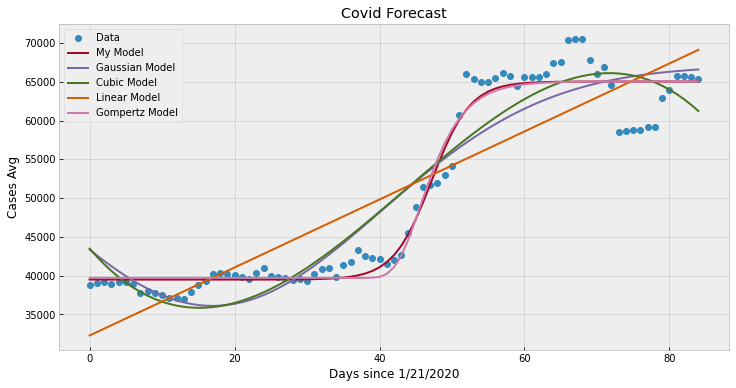

In [76]:
plt.figure(figsize=(12,6))
# Data
plt.plot(days, cases, 'o', label = "Data")
# Model
plt.plot(days, model_1(days,*popt), label = "My Model") 
plt.plot(days, gaussian(days,*popt2), label = "Gaussian Model") 
plt.plot(days, model_2(days,*popt3), label = "Cubic Model") 
plt.plot(days, model_3(days,*popt4), label = "Linear Model")
plt.plot(days, gompertz(days,*popt5), label = "Gompertz Model")
plt.legend()
plt.title("Covid Forecast")
# Don't forget to label your axes
plt.xlabel("Days since 1/21/2020")
plt.ylabel("Cases Avg")

Luckily, `curve_fit` provides us with `pcov`, which is the covariance matrix of the fit parameters. 

&#9989;&nbsp;  **Question 2**: Explain in your own words what information the covariance matrix provides. 

<font size="+3">&#9998;</font> *The values on the diagonal tell us the variance of the coeffs. The other values will tell us the dependence they have on each other*

## Model Validation

It is now time to see how good your models are. In the next code cell I provide some code showing how I will do that in the case of a gaussian.
I sample the fit parameters from a [four-dimensional Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) (we have four parameters) using `pcov` from `curve_fit`. I can then run with those samples to see how confident we should be in the curve we just produced. 

In [77]:
popt, pcov = curve_fit(gaussian, days, cases , p0 = [1e6, 36, 100, 1e5]) # this is the ML step: train model with the data (supervised learning, regression)
print("\n popt is:\n {}\n\n pcov is:\n {}\n".format(popt,pcov)) 


 popt is:
 [-3.09514608e+04  1.69522206e+01  1.07711739e+03  6.70542213e+04]

 pcov is:
 [[ 1.99670021e+06  1.31715823e+02 -1.11827009e+05 -1.60166785e+06]
 [ 1.31715823e+02  1.70404206e+00 -1.37136407e+02 -3.24476622e+02]
 [-1.11827009e+05 -1.37136407e+02  3.33484994e+04  1.95712886e+05]
 [-1.60166785e+06 -3.24476622e+02  1.95712886e+05  1.98380847e+06]]



Text(0, 0.5, 'cases')

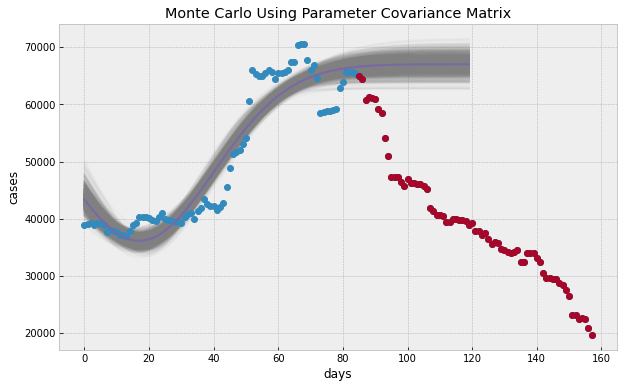

In [89]:
times = np.array([])
# Predict the future
days_fine = np.arange(0, 120)

plt.figure(figsize=(10,6))

# sample from the covariance matrix of fit parameters
for _ in range(1000):
    # IMPORTANT: Make sure you understand what this code snippet does. What role do popt and pcov play here?
    p1, p2, p3, p4 = np.random.multivariate_normal(popt, pcov)
    times = np.append(times,p2)
    sample = gaussian(days_fine, p1, p2, p3, p4)
    plt.plot(days_fine, sample, 'gray', alpha = 0.04)
test = df["cases_avg"].iloc[1085:]
plt.title("Monte Carlo Using Parameter Covariance Matrix")
plt.plot(days, cases, 'o')
plt.plot(np.arange(85,85+len(test)), test, 'o')
plt.plot(days_fine, gaussian(days_fine, popt[0], popt[1], popt[2], popt[3]))
plt.xlabel("days")
plt.ylabel("cases")
# plt.ylim(0,1.2e6)

(array([3.000e+00, 1.000e+00, 6.000e+00, 1.600e+01, 4.600e+01, 5.200e+01,
        1.000e+02, 1.810e+02, 2.650e+02, 4.360e+02, 5.730e+02, 6.930e+02,
        8.120e+02, 9.670e+02, 1.022e+03, 1.013e+03, 8.840e+02, 8.740e+02,
        6.640e+02, 4.780e+02, 3.870e+02, 2.270e+02, 1.240e+02, 9.300e+01,
        5.100e+01, 2.100e+01, 7.000e+00, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([12.01324885, 12.3473003 , 12.68135175, 13.01540319, 13.34945464,
        13.68350609, 14.01755754, 14.35160899, 14.68566044, 15.01971188,
        15.35376333, 15.68781478, 16.02186623, 16.35591768, 16.68996912,
        17.02402057, 17.35807202, 17.69212347, 18.02617492, 18.36022637,
        18.69427781, 19.02832926, 19.36238071, 19.69643216, 20.03048361,
        20.36453505, 20.6985865 , 21.03263795, 21.3666894 , 21.70074085,
        22.0347923 ]),
 <BarContainer object of 30 artists>)

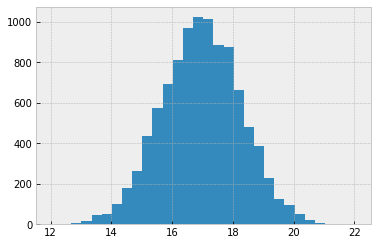

In [81]:
plt.hist(times, bins = 30)

## Part 3: Presentation

Prepare some slides with Google Slides or MS Powerpoint to present your results. Do not worry about the slides design/template. Try to build your slides by include these:

* do different slices: in particular, what if you didn't have the most recent data point?
* explore the data: is there an issue with fitting just after a weekend? (as this ICA was being written, the NYT added data each day - how does each new data point change the regression?)
* discuss with your group whether you believe this prediction or not,
* the code read in the `cases_avg` column from the NYT data - rerun with the `cases` column - what changes? 
* add a [vertical line](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.vlines.html) for Feb 1, 2023 (that's when we switched back to full in-person teaching),
* [annotate the plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) with text and an [arrow](https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/arrow_simple_demo.html) that points to the vertical line with "back in person",
* any other visualization tricks you want to include.

If you have extra time, explore your own ideas with this dataset. If you have some nice results, contact an instructor to volunteer to show your results to the class. 

___

Now that you are done, follow these steps:
* Submit **your** notebook to D2L.
* Be sure to include the names of everyone in your group.

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University.